In [15]:
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline

####[sklearn gradient descent](http://scikit-learn.org/0.7/modules/generated/scikits.learn.linear_model.SGDRegressor.html#scikits.learn.linear_model.SGDRegressor)

####[sklearn preprocessing](http://scikit-learn.org/stable/modules/preprocessing.html)

####[sklearn mean squared errror](http://scikit-learn.org/dev/modules/model_evaluation.html#mean-squared-error)

---
#Gradient Descent
---

---
##There are two *'flavors'* of gradient descent:
### * Batch gradient descent - using all the training examples before an update
### * Stochastic gradient descent - updates after a single training examples
---

In [9]:
#This code creates an artificial dataset of 100 points
m = 200

#Generate m points between 1000 and 3000 as input features x
x=np.array(np.linspace(1000,3000,m))

#Generate a little noise to add to x
z = np.random.rand(m)*100

#Now generate y - a straight line with added noise. The slope is theta1 (0.6) and the y intercept is theta0 (50)
theta0 = 50
theta1 = 0.6
y = [y*theta1 + theta0 for y in x] + z

##Perform the feature scaling

In [12]:
x_scaled = preprocessing.scale(x)

#Plot the data

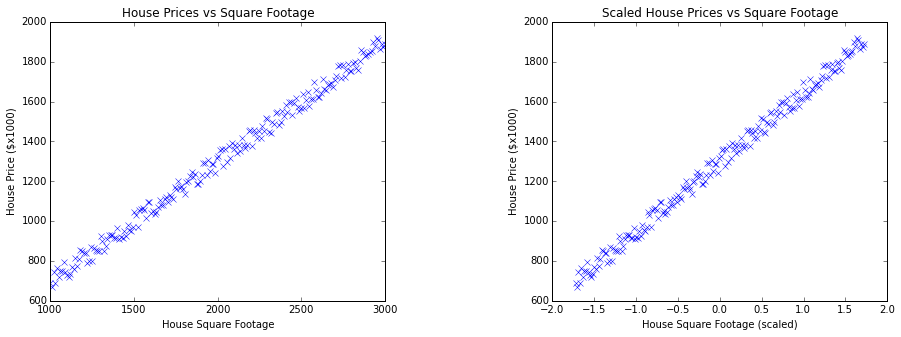

In [21]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,y, 'x')
ax1.set_xlabel("House Square Footage")
ax1.set_ylabel("House Price ($x1000)")
ax1.set_title("House Prices vs Square Footage")

ax2 = fig.add_subplot(1,2,2)
ax2.plot(x_scaled,y, 'x')
ax2.set_xlabel("House Square Footage (scaled)")
ax2.set_ylabel("House Price ($x1000)")
ax2.set_title("Scaled House Prices vs Square Footage")
plt.subplots_adjust(wspace = 0.5, hspace=0.5)

#Now use scikit-learn SGD - stochastic gradient descent

In [20]:
#set the hyper-parameters of the model
clf = SGDRegressor(loss='squared_loss', alpha=0.01, fit_intercept=True, n_iter=100, shuffle=True)

#for using scikit learn you always need to get the input arrays into the correct 'shape'
x1 = x_scaled.reshape(m,1)

#fit the model
clf.fit(x1, y)

y_true = y
y_pred = clf.predict(x1)
print mean_squared_error(y_true, y_pred)

869.54403118


[ 345.95252702]
[ 1298.52385676]


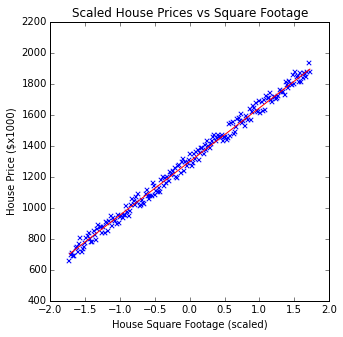

In [8]:
#plot the results
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("House Square Footage (scaled)")
ax.set_ylabel("House Price ($x1000)")
ax.set_title("Scaled House Prices vs Square Footage")
ax.scatter(x1, y, marker='x', color='b')
ax.plot(x1, clf.predict(x1), color='r')

#print out theta1 and theta0
print clf.coef_
print clf.intercept_